In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Task 1

In [6]:
dt = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
dt.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [7]:
y_train = dt['class']
X_train = dt.drop('class', axis=1)

In [8]:
clf = RandomForestClassifier(random_state=0)
params = {'n_estimators': range(10, 51, 10),
          'max_depth': range(1, 13, 2),
          'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 10, 2)
          }

In [9]:
gs = GridSearchCV(estimator=clf, param_grid=params, n_jobs=-1, cv=3)

In [10]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [11]:
gs.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

## Task 2

In [12]:
best = gs.best_estimator_


In [13]:
feature_importances = best.feature_importances_
features = pd.DataFrame({'features': list(X_train),
                         'feature_importances': feature_importances}
                        )
features.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [14]:
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [15]:
predictions = best.predict(test)

In [16]:
pd.Series(predictions).value_counts()

0    1055
1     976
dtype: int64

## Task 3

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [19]:
mr = pd.read_csv('datasets/testing_y_mush.csv')
mr.head()

,class
0,0
1,0
2,1
3,1
4,1


In [20]:
cm = confusion_matrix(mr, predictions)

<Axes: >

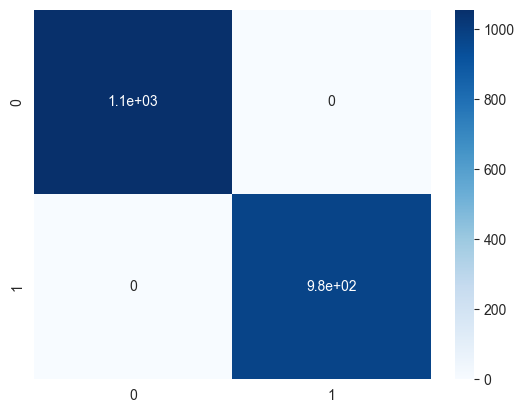

In [22]:
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot()
sns.heatmap(cm, annot=True, cmap="Blues")

## Task 4

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
dt = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
dt.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [25]:
y_train = dt['class']
X_train = dt.drop('class', axis=1)

In [26]:
clf = RandomForestClassifier(random_state=0)
params = {'n_estimators': range(10, 100),
          'max_depth': range(1, 30),
          'min_samples_leaf': range(1, 15),
          'min_samples_split': range(2, 15)
          }

In [27]:
gs = RandomizedSearchCV(estimator=clf, param_distributions=params, n_jobs=-1, cv=3, n_iter=30)

In [28]:
gs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 30),
                                        'min_samples_leaf': range(1, 15),
                                        'min_samples_split': range(2, 15),
                                        'n_estimators': range(10, 100)})

In [29]:
best = gs.best_estimator_
gs.best_params_

{'n_estimators': 19,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_depth': 16}

In [30]:
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [31]:
predictions = best.predict(test)

In [32]:
pd.Series(predictions).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

## Task 5

In [33]:
feature_importances = best.feature_importances_
features = pd.DataFrame({'features': list(X_train),
                         'feature_importances': feature_importances}
                        )
features.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,volume,0.340243
3,brightness,0.271151
1,i_reflection,0.143389
0,g_reflection,0.130657
2,speed,0.114535
4,time_of_observance,0.000025


## Task 6

In [34]:
dt = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
dt.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [35]:
dt.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


# Pandas trick

In [36]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')

In [37]:
%%timeit
df.mean(axis=0)  # The best

296 µs ± 46.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [38]:
%%timeit
df.apply('mean')

340 µs ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [39]:
%%timeit
df.apply(np.mean)

611 µs ± 40.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [40]:
%%timeit
df.describe().loc['mean']

7.12 ms ± 477 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
